# 0. START

## 0.0. LIBRARY DOWNLOAD

In [2]:
pip install pandas seaborn numpy matplotlib scipy math

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math
You should consider upgrading via the 'c:\Users\arqui\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


## 0.1. IMPORTS

In [4]:
import math #identificar num
import numpy  as np
import pandas as pd
import datetime as datetime

import seaborn as sns #visualisation

from matplotlib import pyplot as plt

## 0.3. Loading data

In [5]:
turno1 = pd.read_csv('presidente1.csv', encoding='latin', sep=';', low_memory=False)
turno2 = pd.read_csv('presidente2.csv', encoding='latin', sep=';', low_memory=False)
distrital = pd.read_csv('votacao_df.csv', encoding='latin', sep=';', low_memory=False)

In [9]:
display('Tipos dados do turno 1', turno1.dtypes)
display('Tipos dados do turno 2',turno2.dtypes)
display('Tipos dados do distritais',distrital.dtypes)

'Tipos dados do turno 1'

ANO_ELEICAO          int64
NR_TURNO             int64
DT_ELEICAO          object
SG_UF               object
SG_UE               object
NM_UE               object
CD_MUNICIPIO         int64
NM_MUNICIPIO        object
NR_ZONA              int64
NR_SECAO             int64
CD_CARGO             int64
DS_CARGO            object
NR_VOTAVEL           int64
NM_VOTAVEL          object
NR_LOCAL_VOTACAO     int64
SQ_CANDIDATO         int64
QT_Votos             int64
dtype: object

'Tipos dados do turno 2'

ANO_ELEICAO          int64
NR_TURNO             int64
DT_ELEICAO          object
SG_UF               object
SG_UE               object
NM_UE               object
CD_MUNICIPIO         int64
NM_MUNICIPIO        object
NR_ZONA              int64
NR_SECAO             int64
CD_CARGO             int64
DS_CARGO            object
NR_VOTAVEL           int64
NM_VOTAVEL          object
NR_LOCAL_VOTACAO     int64
SQ_CANDIDATO         int64
QT_VOTOS             int64
dtype: object

'Tipos dados do distritais'

ANO_ELEICAO          int64
NR_TURNO             int64
SG_UF               object
SG_UE               object
NM_UE               object
CD_MUNICIPIO         int64
NM_MUNICIPIO        object
NR_ZONA              int64
NR_SECAO             int64
CD_CARGO             int64
DS_CARGO            object
NR_VOTAVEL           int64
NM_VOTAVEL          object
NR_LOCAL_VOTACAO     int64
SQ_CANDIDATO         int64
QT_VOTOS             int64
dtype: object

# 1.0. DATA DESCRIPTION

In [64]:
turno1 = turno1.loc[turno1.SG_UF == 'DF'].reset_index(drop=True)
turno2 = turno2.loc[turno2.SG_UF == 'DF'].reset_index(drop=True)


## 1.1. Type Transformation

In [65]:
turno1.DT_ELEICAO = pd.to_datetime(turno1.DT_ELEICAO)
turno2.DT_ELEICAO = pd.to_datetime(turno2.DT_ELEICAO)

## 1.2. Data Dimensions

In [66]:
display( 'Number of Rows turno1: {}'.format( turno1.shape[0] ) )
display( 'Number of Cols turno1: {}'.format( turno1.shape[1] ) )

display( 'Number of Rows turno2: {}'.format( turno2.shape[0] ) )
display( 'Number of Cols turno2: {}'.format( turno2.shape[1] ) )

display( 'Number of Rows distrital: {}'.format( distrital.shape[0] ) )
display( 'Number of Cols distrital: {}'.format( distrital.shape[1] ) )

'Number of Rows turno1: 53647'

'Number of Cols turno1: 17'

'Number of Rows turno2: 26792'

'Number of Cols turno2: 17'

'Number of Rows distrital: 1238611'

'Number of Cols distrital: 16'

## 1.4. Check NA

In [67]:
display('turno 1', turno1.isna().sum())
display('turno 2', turno2.isna().sum())
display('distrital', distrital.isna().sum())

'turno 1'

ANO_ELEICAO         0
NR_TURNO            0
DT_ELEICAO          0
SG_UF               0
SG_UE               0
NM_UE               0
CD_MUNICIPIO        0
NM_MUNICIPIO        0
NR_ZONA             0
NR_SECAO            0
CD_CARGO            0
DS_CARGO            0
NR_VOTAVEL          0
NM_VOTAVEL          0
NR_LOCAL_VOTACAO    0
SQ_CANDIDATO        0
QT_Votos            0
dtype: int64

'turno 2'

ANO_ELEICAO         0
NR_TURNO            0
DT_ELEICAO          0
SG_UF               0
SG_UE               0
NM_UE               0
CD_MUNICIPIO        0
NM_MUNICIPIO        0
NR_ZONA             0
NR_SECAO            0
CD_CARGO            0
DS_CARGO            0
NR_VOTAVEL          0
NM_VOTAVEL          0
NR_LOCAL_VOTACAO    0
SQ_CANDIDATO        0
QT_VOTOS            0
dtype: int64

'distrital'

ANO_ELEICAO         0
NR_TURNO            0
SG_UF               0
SG_UE               0
NM_UE               0
CD_MUNICIPIO        0
NM_MUNICIPIO        0
NR_ZONA             0
NR_SECAO            0
CD_CARGO            0
DS_CARGO            0
NR_VOTAVEL          0
NM_VOTAVEL          0
NR_LOCAL_VOTACAO    0
SQ_CANDIDATO        0
QT_VOTOS            0
dtype: int64

## 1.7. Descriptive Statistics

In [160]:
num_attributes_turno1 = turno1.select_dtypes( include=['int64', 'float64'] ) #todas as variaveis numericas
cat_attributes_turno1 = turno1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] ) #eclui todas as variaves numericas e data

num_attributes_turno2 = turno2.select_dtypes( include=['int64', 'float64'] ) #todas as variaveis numericas
cat_attributes_turno2 = turno2.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] ) #eclui todas as variaves numericas e data

num_attributes_distrital = distrital.select_dtypes( include=['int64', 'float64'] ) #todas as variaveis numericas
cat_attributes_distrital = distrital.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] ) #eclui todas as variaves numericas e data

### 1.7.1. Numerical Atributes

In [146]:
turno1.head(1)

,ANO_ELEICAO,NR_TURNO,DT_ELEICAO,SG_UF,SG_UE,NM_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,CD_CARGO,DS_CARGO,NR_VOTAVEL,NM_VOTAVEL,NR_LOCAL_VOTACAO,SQ_CANDIDATO,QT_Votos
0,2022,1,2022-02-10,DF,BR,BRASIL,97012,BRASÍLIA,14,164,1,PRESIDENTE,15,SIMONE NASSAR TEBET,1074,280001607833,28


In [147]:
turno1.dtypes

ANO_ELEICAO                  int64
NR_TURNO                     int64
DT_ELEICAO          datetime64[ns]
SG_UF                       object
SG_UE                       object
NM_UE                       object
CD_MUNICIPIO                 int64
NM_MUNICIPIO                object
NR_ZONA                      int64
NR_SECAO                     int64
CD_CARGO                     int64
DS_CARGO                    object
NR_VOTAVEL                   int64
NM_VOTAVEL                  object
NR_LOCAL_VOTACAO             int64
SQ_CANDIDATO                 int64
QT_Votos                     int64
dtype: object

In [161]:
# Central Tendency - mean, meadina 
ct1 = pd.DataFrame( num_attributes_turno1.apply( np.mean ).astype(int) ).T
ct2 = pd.DataFrame( num_attributes_turno1.apply( np.median ).astype(int) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes_turno1.apply( np.std ) ).T 
d2 = pd.DataFrame( num_attributes_turno1.apply( min ) ).T 
d3 = pd.DataFrame( num_attributes_turno1.apply( max ).astype(int) ).T 
d4 = pd.DataFrame( num_attributes_turno1.apply( lambda x: x.max() - x.min() ) ).T 
d5 = pd.DataFrame( num_attributes_turno1.apply( lambda x: x.skew() ) ).T # mede a assimitria dis dasdos. Para a direita positiva e esquerda negativa
d6 = pd.DataFrame( num_attributes_turno1.apply( lambda x: x.kurtosis() ) ).T # mede a distribuiçao dos dados. calda curta (leptocurtica) mais fechada que a 
#distribuiçao normal. Calda longa (platicurtica) mais aberta que a distribuiçao bnormal. Quanto mais proxima de 0 o aor mais Normal é

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'minimo', 'maximo', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m
# teste = pd.DataFrame(m)

,attributes,minimo,maximo,range,mean,median,std,skew,kurtosis
0,ANO_ELEICAO,2022.0,2022.0,0.000000e+00,2.022000e+03,2.022000e+03,0.000000e+00,0.000000,0.000000
1,NR_TURNO,1.0,1.0,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000
2,CD_MUNICIPIO,97012.0,97012.0,0.000000e+00,9.701200e+04,9.701200e+04,0.000000e+00,0.000000,0.000000
3,NR_ZONA,1.0,21.0,2.000000e+01,1.100000e+01,1.300000e+01,5.982543e+00,-0.128073,-1.225526
4,NR_SECAO,1.0,2022.0,2.021000e+03,2.790000e+02,2.550000e+02,1.972381e+02,1.107494,2.518322
5,CD_CARGO,1.0,1.0,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000
6,NR_VOTAVEL,12.0,96.0,8.400000e+01,4.000000e+01,2.200000e+01,3.366677e+01,0.882142,-1.002271
7,NR_LOCAL_VOTACAO,1015.0,2208.0,1.193000e+03,1.329000e+03,1.287000e+03,2.531089e+02,0.936469,0.335531
8,SQ_CANDIDATO,-1.0,828859789.0,2.800017e+11,-2.147484e+09,-2.147484e+09,1.202715e+11,-1.191651,-0.579989
9,QT_Votos,1.0,278.0,2.770000e+02,3.300000e+01,7.000000e+00,5.003939e+01,1.429584,0.581676


In [162]:
turno1.QT_Votos.mean()

33.923611758346226

In [159]:
# Central Tendency - mean, meadina 
ct1 = pd.DataFrame( num_attributes_turno2.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes_turno2.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes_turno2.apply( np.std ) ).T 
d2 = pd.DataFrame( num_attributes_turno2.apply( min ) ).T 
d3 = pd.DataFrame( num_attributes_turno2.apply( max ).astype(int)  ).T 
d4 = pd.DataFrame( num_attributes_turno2.apply( lambda x: x.max() - x.min() ) ).T 
d5 = pd.DataFrame( num_attributes_turno2.apply( lambda x: x.skew() ) ).T # mede a assimitria dis dasdos. Para a direita positiva e esquerda negativa
d6 = pd.DataFrame( num_attributes_turno2.apply( lambda x: x.kurtosis() ) ).T # mede a distribuiçao dos dados. calda curta (leptocurtica) mais fechada que a 
#distribuiçao normal. Calda longa (platicurtica) mais aberta que a distribuiçao bnormal. Quanto mais proxima de 0 o aor mais Normal é

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'minimo', 'maximo', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,minimo,maximo,range,mean,median,std,skew,kurtosis
0,ANO_ELEICAO,2022.0,2022.0,0.000000e+00,2.022000e+03,2.022000e+03,0.000000e+00,0.000000,0.000000
1,NR_TURNO,2.0,2.0,0.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,0.000000,0.000000
2,CD_MUNICIPIO,97012.0,97012.0,0.000000e+00,9.701200e+04,9.701200e+04,0.000000e+00,0.000000,0.000000
3,NR_ZONA,1.0,21.0,2.000000e+01,1.141423e+01,1.300000e+01,5.985110e+00,-0.130143,-1.228109
4,NR_SECAO,1.0,2022.0,2.021000e+03,2.798690e+02,2.550000e+02,1.970660e+02,1.108358,2.532425
5,CD_CARGO,1.0,1.0,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000
6,NR_VOTAVEL,13.0,96.0,8.300000e+01,5.621006e+01,2.200000e+01,3.913226e+01,-0.004745,-1.973676
7,NR_LOCAL_VOTACAO,1015.0,2208.0,1.193000e+03,1.329641e+03,1.287000e+03,2.531166e+02,0.934306,0.328825
8,SQ_CANDIDATO,-1.0,828743796.0,2.800016e+11,1.410459e+11,-2.147484e+09,1.399969e+11,-0.014931,-1.999926
9,QT_VOTOS,1.0,297.0,2.960000e+02,6.862093e+01,5.600000e+01,6.778036e+01,0.375612,-1.400263


In [157]:
# Central Tendency - mean, meadina 
ct1 = pd.DataFrame( num_attributes_distrital.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes_distrital.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes_distrital.apply( np.std ) ).T 
d2 = pd.DataFrame( num_attributes_distrital.apply( min ) ).T 
d3 = pd.DataFrame( num_attributes_distrital.apply( max ).astype(int) ).T 
d4 = pd.DataFrame( num_attributes_distrital.apply( lambda x: x.max() - x.min() ) ).T 
d5 = pd.DataFrame( num_attributes_distrital.apply( lambda x: x.skew() ) ).T # mede a assimitria dis dasdos. Para a direita positiva e esquerda negativa
d6 = pd.DataFrame( num_attributes_distrital.apply( lambda x: x.kurtosis() ) ).T # mede a distribuiçao dos dados. calda curta (leptocurtica) mais fechada que a 
#distribuiçao normal. Calda longa (platicurtica) mais aberta que a distribuiçao bnormal. Quanto mais proxima de 0 o aor mais Normal é

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'minimo', 'maximo', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,minimo,maximo,range,mean,median,std,skew,kurtosis
0,ANO_ELEICAO,2022.0,2.022000e+03,0.000000e+00,2.022000e+03,2.022000e+03,0.000000e+00,0.000000,0.000000
1,NR_TURNO,1.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000
2,CD_MUNICIPIO,97012.0,9.701200e+04,0.000000e+00,9.701200e+04,9.701200e+04,0.000000e+00,0.000000,0.000000
3,NR_ZONA,1.0,2.100000e+01,2.000000e+01,1.151893e+01,1.300000e+01,5.942320e+00,-0.163403,-1.183196
4,NR_SECAO,1.0,2.022000e+03,2.021000e+03,2.792980e+02,2.530000e+02,1.976846e+02,1.023950,1.460944
5,CD_CARGO,3.0,8.000000e+00,5.000000e+00,6.937757e+00,8.000000e+00,1.389404e+00,-1.167783,0.815530
6,NR_VOTAVEL,10.0,9.099900e+04,9.098900e+04,1.766423e+04,1.101100e+04,2.021535e+04,1.263432,0.969810
7,NR_LOCAL_VOTACAO,1015.0,2.208000e+03,1.193000e+03,1.325990e+03,1.279000e+03,2.525667e+02,0.970113,0.418687
8,SQ_CANDIDATO,-3.0,1.282271e+09,7.000175e+10,6.236776e+10,7.000162e+10,2.181989e+10,-2.508443,4.292293
9,QT_VOTOS,1.0,2.740000e+02,2.730000e+02,5.837132e+00,2.000000e+00,1.512977e+01,6.041270,43.057964


C:\Users\arqui\AppData\Local\Temp\ipykernel_2436\2966120003.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( distrital.CD_CARGO, kde=False )


<AxesSubplot: xlabel='CD_CARGO'>

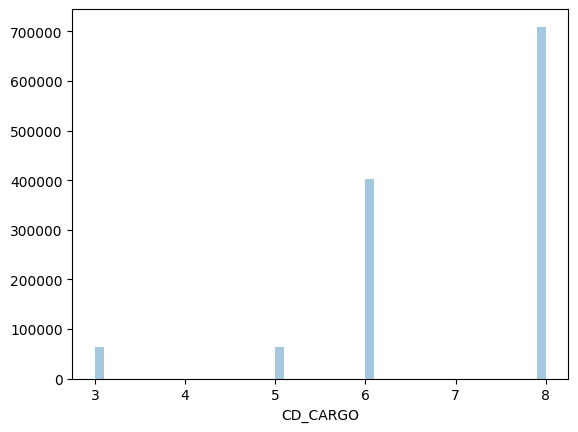

In [42]:
sns.distplot( distrital.CD_CARGO, kde=False )

### 1.7.2. Categorical Atributes

In [44]:
cat_attributes_turno2.apply( lambda x: x.unique().shape[0] )

SG_UF             28
SG_UE              1
NM_UE              1
NM_MUNICIPIO    5427
DS_CARGO           1
NM_VOTAVEL         4
dtype: int64

In [163]:
turno1.head(1)

,ANO_ELEICAO,NR_TURNO,DT_ELEICAO,SG_UF,SG_UE,NM_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,CD_CARGO,DS_CARGO,NR_VOTAVEL,NM_VOTAVEL,NR_LOCAL_VOTACAO,SQ_CANDIDATO,QT_Votos
0,2022,1,2022-02-10,DF,BR,BRASIL,97012,BRASÍLIA,14,164,1,PRESIDENTE,15,SIMONE NASSAR TEBET,1074,280001607833,28


<AxesSubplot: xlabel='NR_VOTAVEL', ylabel='QT_Votos'>

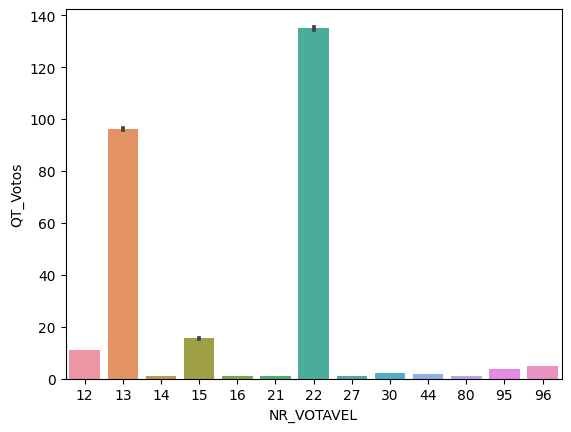

In [175]:
aux = turno1
sns.barplot( x='NR_VOTAVEL', y='QT_Votos', data=aux )



In [177]:
turno2.head()

,ANO_ELEICAO,NR_TURNO,DT_ELEICAO,SG_UF,SG_UE,NM_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,CD_CARGO,DS_CARGO,NR_VOTAVEL,NM_VOTAVEL,NR_LOCAL_VOTACAO,SQ_CANDIDATO,QT_VOTOS
0,2022,2,2022-10-30,DF,BR,BRASIL,97012,BRASÍLIA,16,233,1,PRESIDENTE,13,LUIZ INÁCIO LULA DA SILVA,1260,280001607829,93
1,2022,2,2022-10-30,DF,BR,BRASIL,97012,BRASÍLIA,19,286,1,PRESIDENTE,13,LUIZ INÁCIO LULA DA SILVA,1252,280001607829,98
2,2022,2,2022-10-30,DF,BR,BRASIL,97012,BRASÍLIA,16,408,1,PRESIDENTE,13,LUIZ INÁCIO LULA DA SILVA,1457,280001607829,94
3,2022,2,2022-10-30,DF,BR,BRASIL,97012,BRASÍLIA,13,538,1,PRESIDENTE,13,LUIZ INÁCIO LULA DA SILVA,1600,280001607829,104
4,2022,2,2022-10-30,DF,BR,BRASIL,97012,BRASÍLIA,5,416,1,PRESIDENTE,13,LUIZ INÁCIO LULA DA SILVA,1813,280001607829,109


In [179]:
turno2.NR_ZONA.unique()

array([16, 19, 13,  5, 20,  1, 18, 21, 17,  6, 10, 11,  3, 15,  2,  9,  4,
       14,  8], dtype=int64)

<AxesSubplot: xlabel='NR_VOTAVEL', ylabel='QT_VOTOS'>

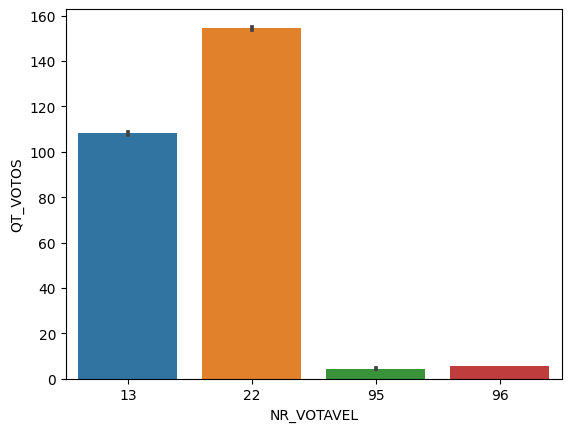

In [178]:
aux = turno2
sns.barplot( x='NR_VOTAVEL', y='QT_VOTOS', data=aux )

<AxesSubplot: xlabel='NR_ZONA', ylabel='QT_VOTOS'>

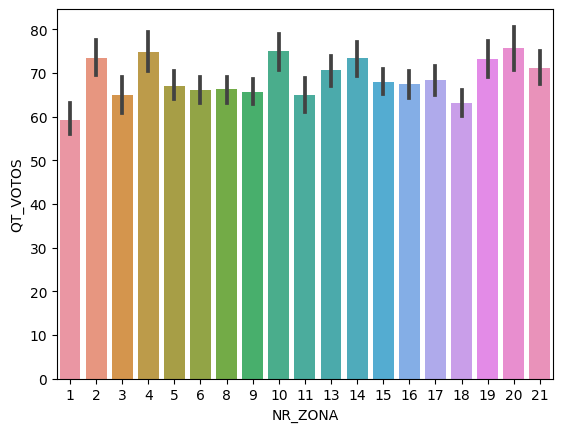

In [181]:
aux = turno2
sns.barplot( x='NR_ZONA', y='QT_VOTOS', data=aux )

<AxesSubplot: xlabel='NR_SECAO', ylabel='QT_Votos'>

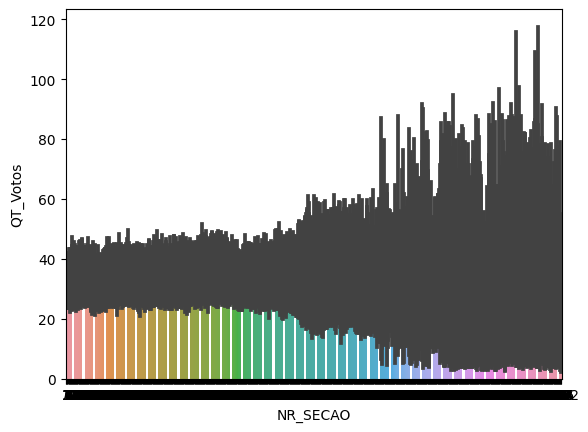

In [173]:
sns.barplot( x='NR_SECAO', y='QT_Votos', data=aux )

# plt.subplot( 1, 3, 3 )
# sns.barplot( x='NR_SECAO', y='QT_Votos', data=aux )

# 2.0.  FEATURE ENGINEERING

In [ ]:
df2 = df1.copy()

## 2.1. Mapa Mental de Hipoteses

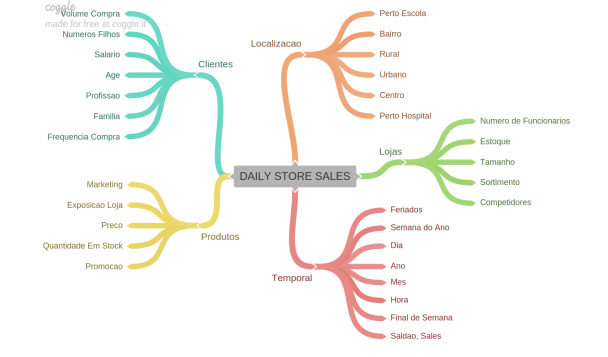

In [ ]:
Image( '/home/arquinho/REPOS/ds-producao/DsProducao/img/Hypothesis.png' )

## 2.2. Criacao das Hipoteses

### 2.2.1. Hipoteses Loja

**1.** Lojas com número maior de funcionários deveriam vender mais.

**2.** Lojas com maior capacidade de estoque deveriam vender mais.

**3.** Lojas com maior porte deveriam vender mais.

**4.** Lojas com maior sortimentos deveriam vender mais.

**5.** Lojas com competidores mais próximos deveriam vender menos.

**6.** Lojas com competidores à mais tempo deveriam vendem mais.

### 2.2.2. Hipoteses Produto

**1.** Lojas que investem mais em Marketing deveriam vender mais.

**2.** Lojas com maior exposição de produto deveriam vender mais.

**3.** Lojas com produtos com preço menor deveriam vender mais.

**5.** Lojas com promoções mais agressivas ( descontos maiores ), deveriam vender mais.

**6.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**7.** Lojas com mais dias de promoção deveriam vender mais.

**8.** Lojas com mais promoções consecutivas deveriam vender mais.

### 2.2.3. Hipoteses Tempo

**1.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**2.** Lojas deveriam vender mais ao longo dos anos.

**3.** Lojas deveriam vender mais no segundo semestre do ano.

**4.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**5.** Lojas deveriam vender menos aos finais de semana.

**6.** Lojas deveriam vender menos durante os feriados escolares.

## 2.3. Lista Final de Hipóteses

**1.** Lojas com maior sortimentos deveriam vender mais.

**2.** Lojas com competidores mais próximos deveriam vender menos.

**3.** Lojas com competidores à mais tempo deveriam vendem mais.

**4.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**5.** Lojas com mais dias de promoção deveriam vender mais.

**7.** Lojas com mais promoções consecutivas deveriam vender mais.

**8.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**9.** Lojas deveriam vender mais ao longo dos anos.

**10.** Lojas deveriam vender mais no segundo semestre do ano.

**11.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**12.** Lojas deveriam vender menos aos finais de semana.

**13.** Lojas deveriam vender menos durante os feriados escolares.


## 2.4. Feature Engineering

In [ ]:
# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day

# week of year
df2['week_of_year'] = df2['date'].dt.isocalendar().week 

# year week
df2['year_week'] = df2['date'].dt.strftime( '%Y-%W' )

# competition since
df2['competition_since'] = df2.apply( lambda x: datetime.datetime( year=x['competition_open_since_year'], month=x['competition_open_since_month'],day=1 ), axis=1 )
df2['competition_time_month'] = ( ( df2['date'] - df2['competition_since'] )/30 ).apply( lambda x: x.days ).astype( int )

# promo since
df2['promo_since'] = df2['promo2_since_year'].astype( str ) + '-' + df2['promo2_since_week'].astype( str )
df2['promo_since'] = df2['promo_since'].apply( lambda x: datetime.datetime.strptime( x + '-1', '%Y-%W-%w' ) - datetime.timedelta( days=7 ) )
df2['promo_time_week'] = ( ( df2['date'] - df2['promo_since'] )/7 ).apply( lambda x: x.days ).astype( int )

# assortment
df2['assortment'] = df2['assortment'].apply( lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended' )

# state holiday
df2['state_holiday'] = df2['state_holiday'].apply( lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day' )

# 3.0.  FILTERING OF VARIABLES

In [ ]:
df3 = df2.copy()

## 3.1. Filtragem das Linhas


In [ ]:
df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)]

## 3.2. Selecao das Colunas

In [ ]:
cols_drop = ['customers', 'open', 'promo_interval', 'month_map']
df3 = df3.drop( cols_drop, axis=1 )

In [ ]:
df3.head().T # .T - Colunas viram linhas

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a
assortment,basic,basic,basic,extended,basic
competition_distance,1270.0,570.0,14130.0,620.0,29910.0


# 4.0.  DATA EXPLORATORY ANALYSIS

In [ ]:
df4 = df3.copy()

### 4.1. Analise Univariada

## 4.1.1. Response Variable

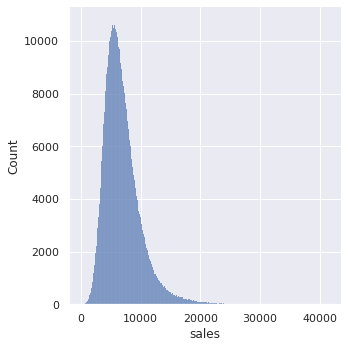

In [ ]:
sns.displot(df4['sales'], kde=False)

## 4.1.1. Numerical Variable

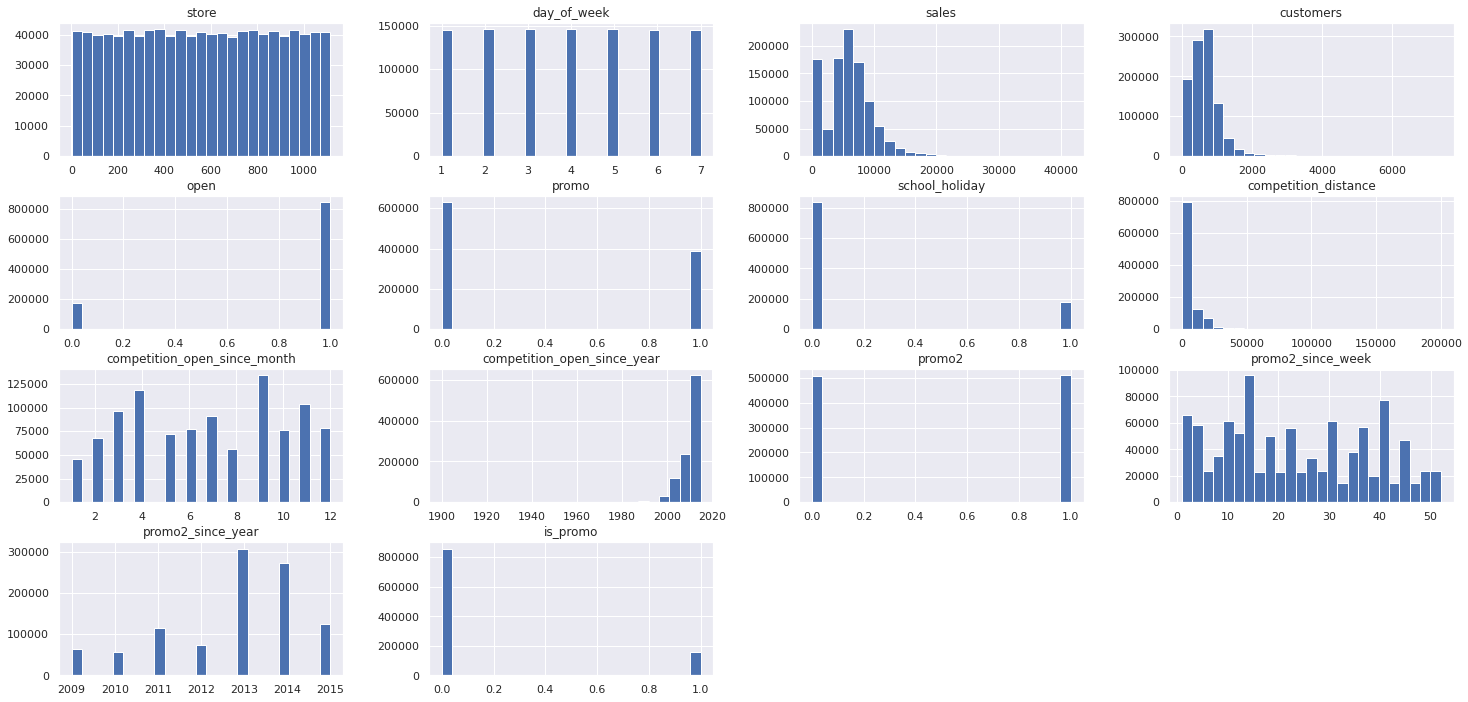

In [ ]:
num_attributes.hist(bins=25)

## 4.1.1. Categorical Variable

/home/arquinho/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/arquinho/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/arquinho/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales', ylabel='Density'>

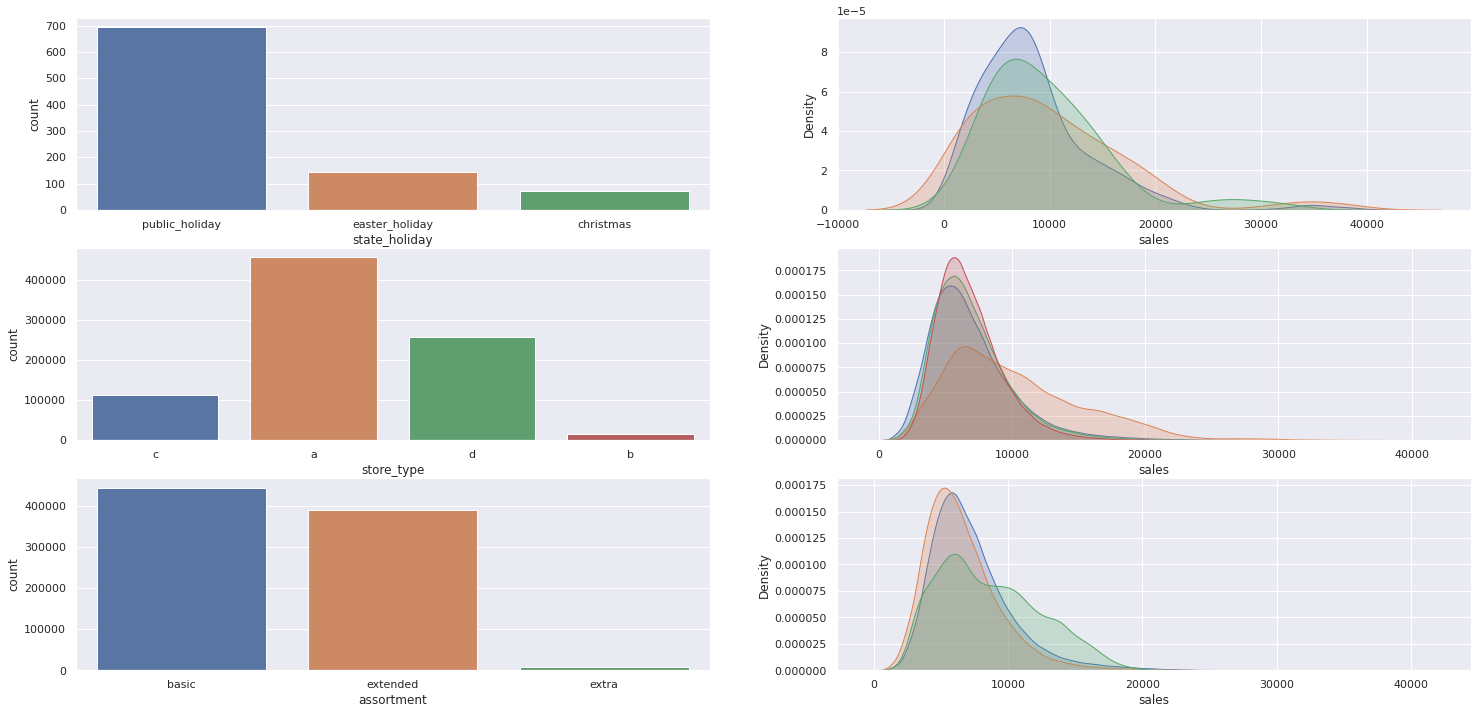

In [ ]:
#state_holiday

plt.subplot(3, 2, 1)
a = df4[df4['state_holiday'] != 'regular_day']
sns.countplot(a['state_holiday'])

plt.subplot(3, 2, 2)
sns.kdeplot(df4[df4['state_holiday'] == 'public_holiday']['sales'],
            label='public_holiday',
            shade=True)
sns.kdeplot(df4[df4['state_holiday'] == 'easter_holiday']['sales'],
            label='easter_holiday',
            shade=True)
sns.kdeplot(df4[df4['state_holiday'] == 'christmas']['sales'],
            label='christmas',
            shade=True)

#store type
plt.subplot(3, 2, 3)
sns.countplot(df4['store_type'])

plt.subplot(3, 2, 4)
sns.kdeplot(df4[df4['store_type'] == 'a']['sales'], label='a', shade=True)
sns.kdeplot(df4[df4['store_type'] == 'b']['sales'], label='b', shade=True)
sns.kdeplot(df4[df4['store_type'] == 'c']['sales'], label='c', shade=True)
sns.kdeplot(df4[df4['store_type'] == 'd']['sales'], label='d', shade=True)

#assortment
plt.subplot(3, 2, 5)
sns.countplot(df4['assortment'])

plt.subplot(3, 2, 6)
sns.kdeplot(df4[df4['assortment'] == 'extended']['sales'],
            label='extended',
            shade=True)
sns.kdeplot(df4[df4['assortment'] == 'basic']['sales'],
            label='basic',
            shade=True)
sns.kdeplot(df4[df4['assortment'] == 'extra']['sales'],
            label='extra',
            shade=True)

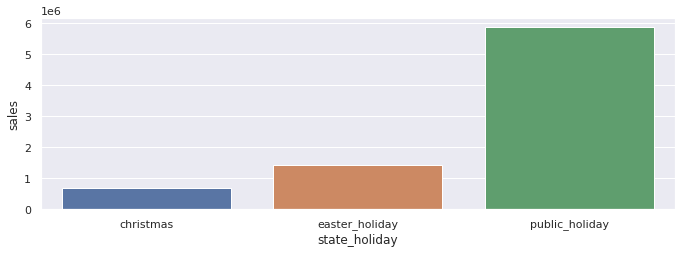

In [ ]:
#state_holiday

plt.subplot(3, 2, 1)
aux1 = df4[df4['state_holiday'] != 'regular_day']
aux1 = aux1[['state_holiday',
             'sales']].groupby('state_holiday').sum().reset_index()
sns.barplot(x='state_holiday', y='sales', data=aux1)

## 4.2. Analise Bivariada

**1.** Lojas com maior sortimentos deveriam vender mais.

**VERDADEIRO** Lojas com MAIOR SORTIMENTO vendem MAIS

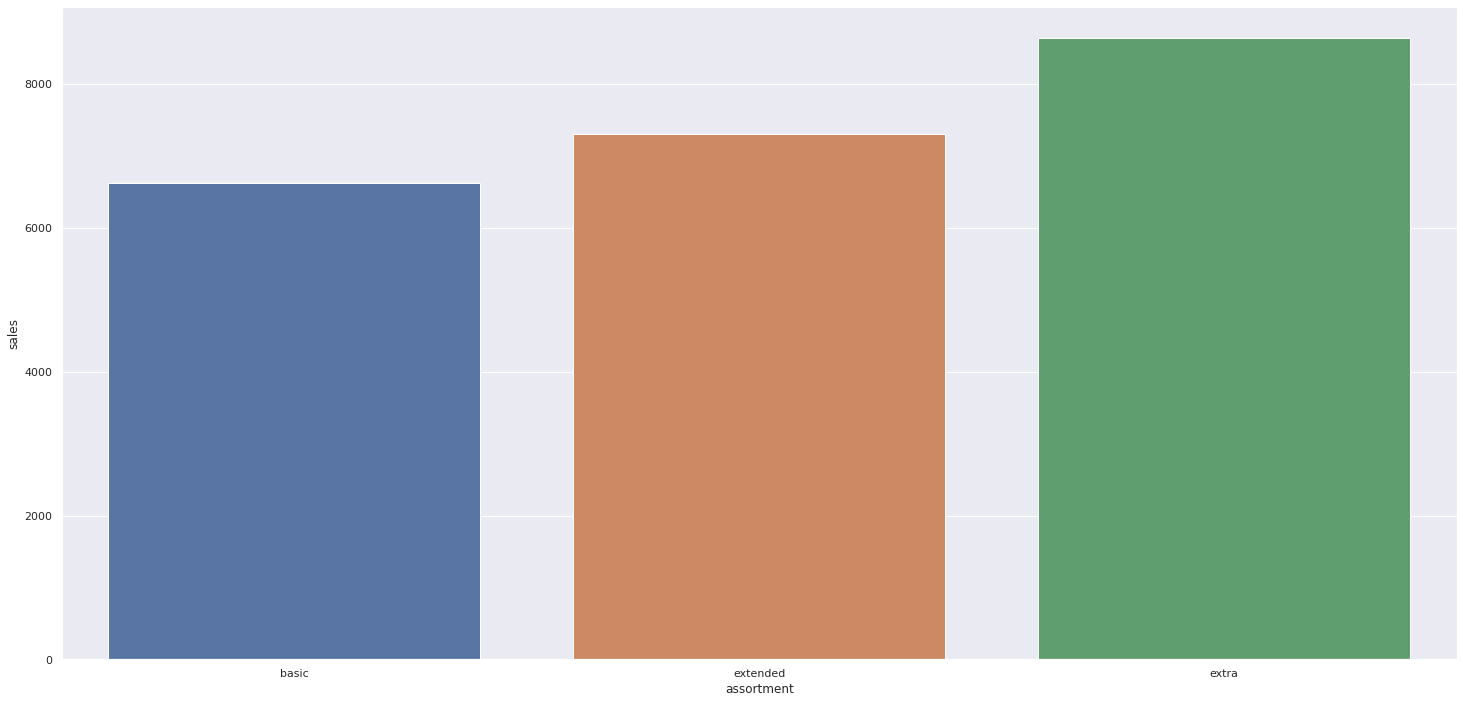

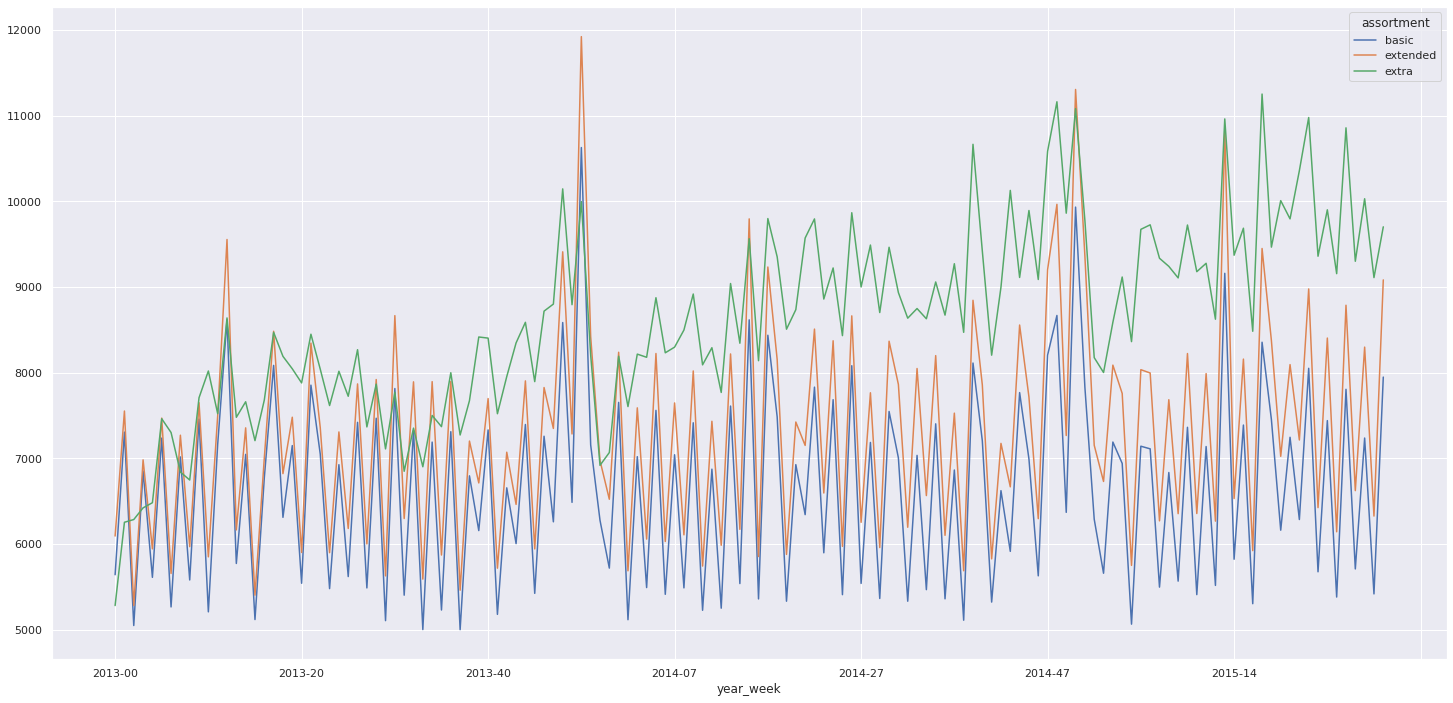

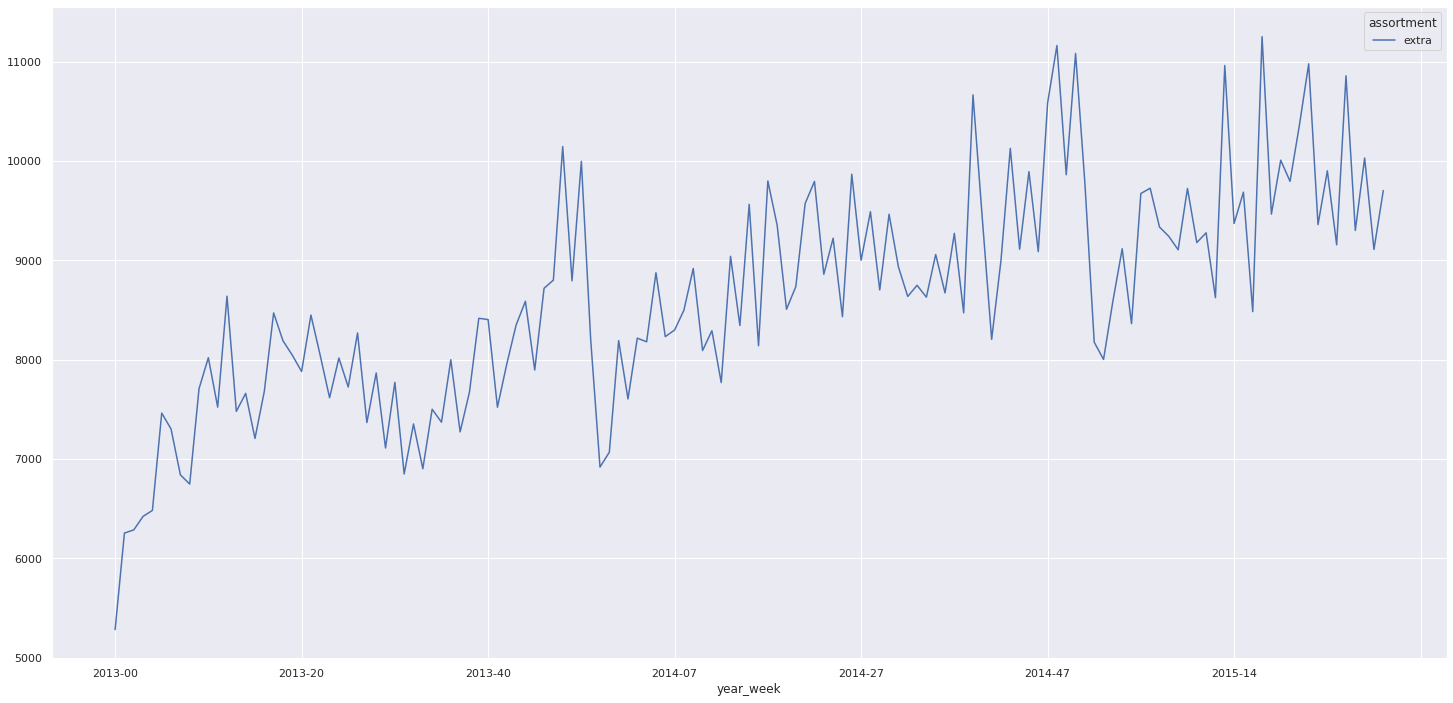

In [ ]:
aux1 = df4[['assortment', 'sales']].groupby('assortment').mean().reset_index()
sns.barplot(x='assortment', y='sales', data=aux1)

aux2 = df4[['year_week', 'assortment',
            'sales']].groupby(['year_week',
                               'assortment']).mean().reset_index()
aux2.pivot(index='year_week', columns='assortment', values='sales').plot()

aux3 = aux2[aux2['assortment'] == 'extra']
aux3.pivot(index='year_week', columns='assortment', values='sales').plot()

**2.** Lojas com competidores mais próximos deveriam vender menos.

**FALSA** Lojas com COMPETIDORES MAIS PROXIMOS vendem MAIS

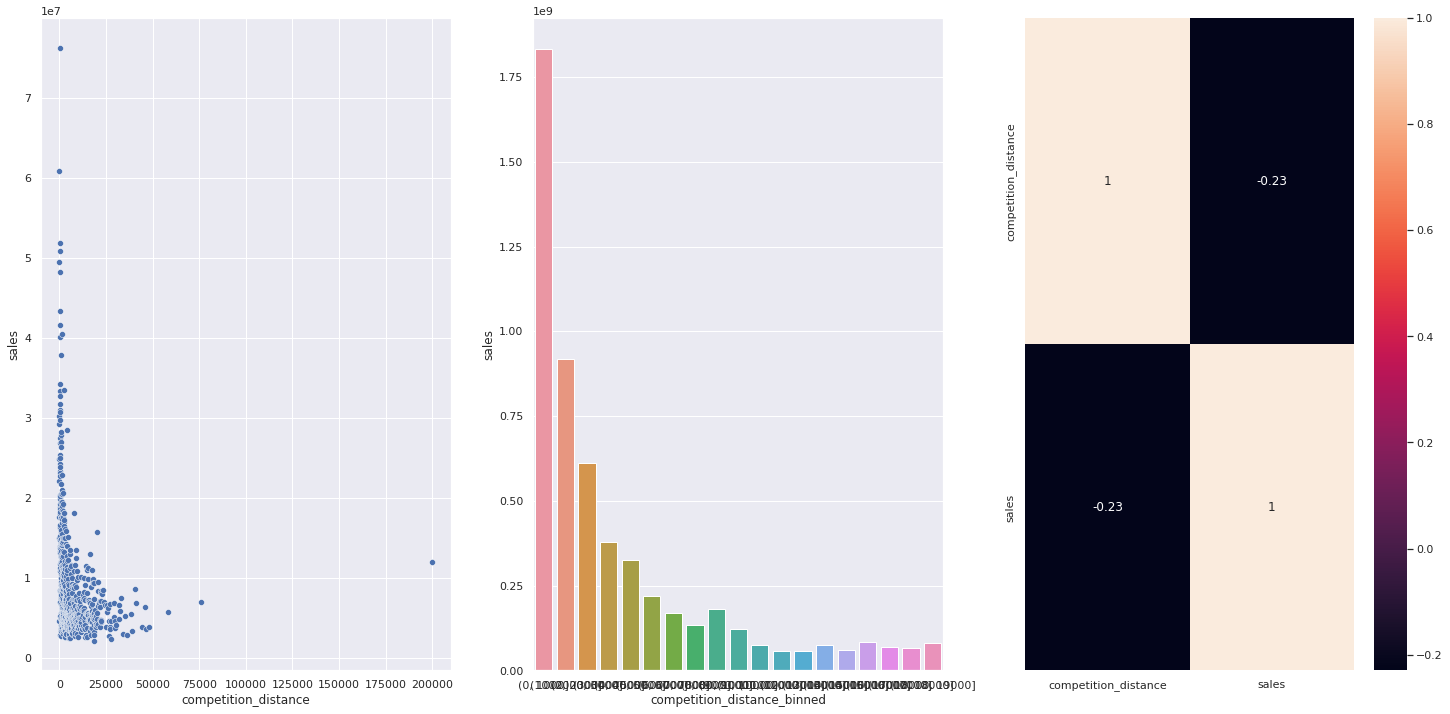

In [ ]:
aux1 = df4[['competition_distance',
            'sales']].groupby('competition_distance').sum().reset_index()

plt.subplot(1, 3, 1)
sns.scatterplot(x='competition_distance', y='sales', data=aux1)

plt.subplot(1, 3, 2)
bins = list(np.arange(0, 20000, 1000))

aux1['competition_distance_binned'] = pd.cut(aux1['competition_distance'],
                                             bins=bins)

aux2 = aux1[['competition_distance_binned', 'sales'
             ]].groupby('competition_distance_binned').sum().reset_index()

sns.barplot(x='competition_distance_binned', y='sales', data=aux2)

plt.subplot(1, 3, 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True)


**3.** Lojas com competidores à mais tempo deveriam vendem mais.

**FALSA** Lojas com COMPETIDORES A MAIS TEMPO vendem MENOS 

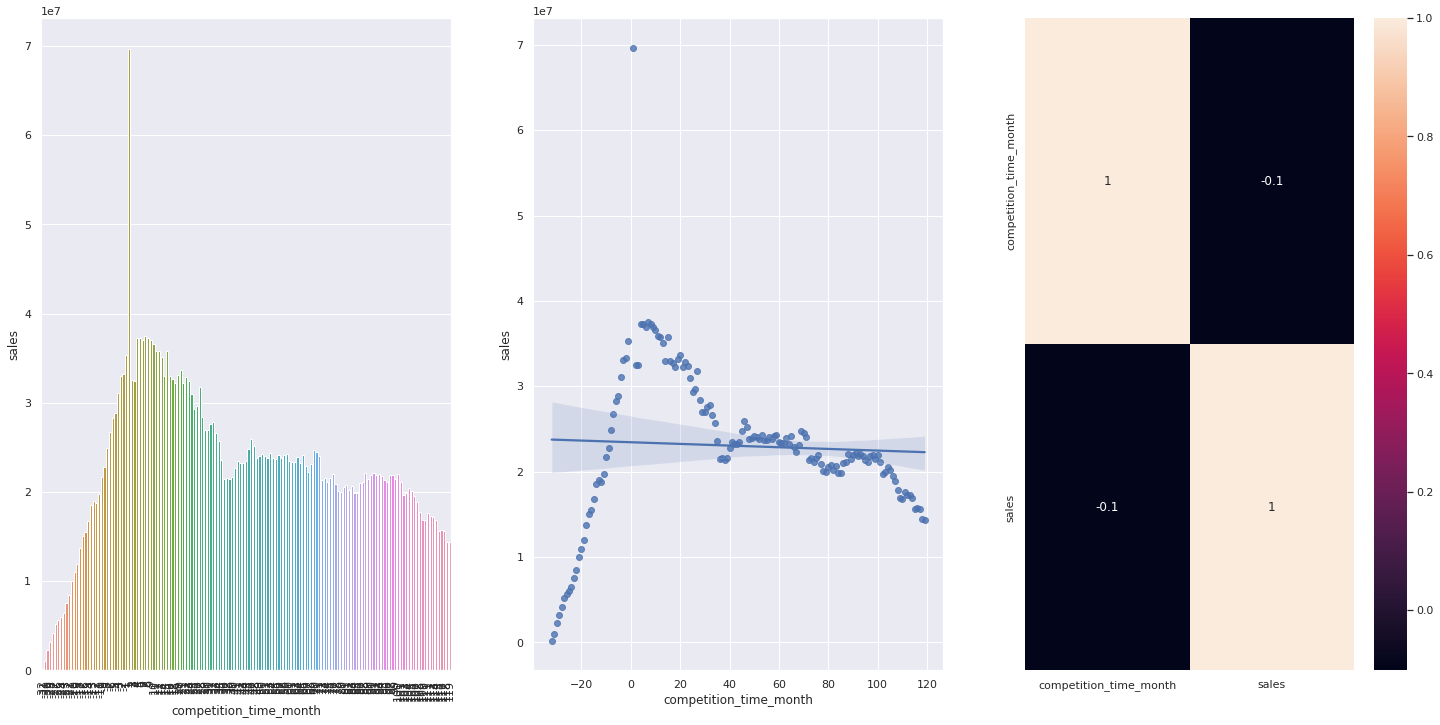

In [ ]:
plt.subplot(1, 3, 1)
aux1 = df4[['competition_time_month',
            'sales']].groupby('competition_time_month').sum().reset_index()
aux2 = aux1[(aux1['competition_time_month'] < 120)
            & (aux1['competition_time_month'] != 0)]
sns.barplot(x='competition_time_month', y='sales', data=aux2)
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
sns.regplot(x='competition_time_month', y='sales', data=aux2)

plt.subplot(1, 3, 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True)

**4.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**FALSA** Lojas com promocoes ATIVAS por MAIS TMEPO vendem MENOS depois de certo periodo de tempo

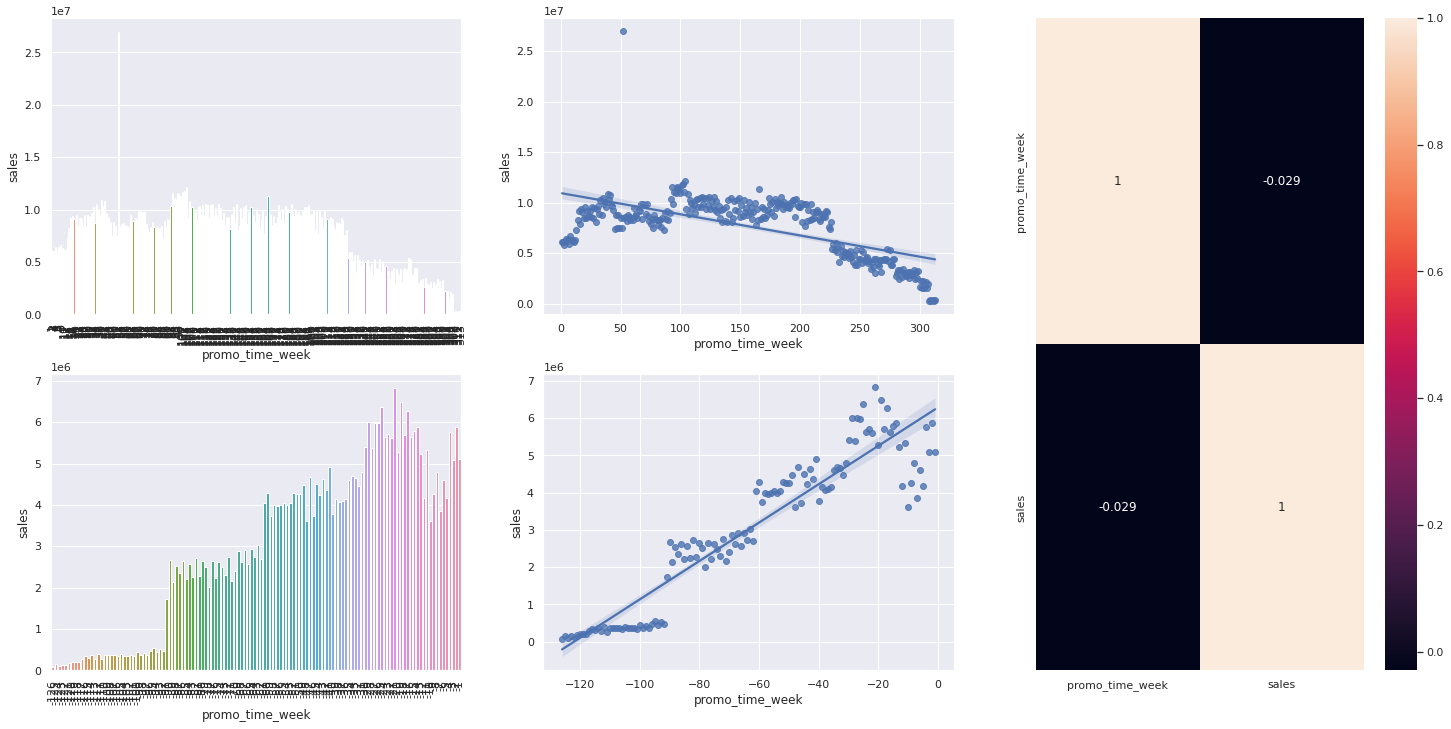

In [ ]:
aux1 = df4[['promo_time_week',
            'sales']].groupby('promo_time_week').sum().reset_index()

grid = GridSpec(2, 3)

plt.subplot(grid[0, 0])
aux2 = aux1[aux1['promo_time_week'] > 0]  #promo extendido
sns.barplot(x='promo_time_week', y='sales', data=aux2)
plt.xticks(rotation=90)

plt.subplot(grid[0, 1])
sns.regplot(x='promo_time_week', y='sales', data=aux2)

plt.subplot(grid[1, 0])
aux3 = aux1[aux1['promo_time_week'] < 0]  #regular promo
sns.barplot(x='promo_time_week', y='sales', data=aux3)
plt.xticks(rotation=90)

plt.subplot(grid[1, 1])
sns.regplot(x='promo_time_week', y='sales', data=aux3)

plt.subplot(grid[:, 2])
sns.heatmap(aux1.corr(method='pearson'), annot=True)


**5.** <s>Lojas com mais dias de promoção deveriam vender mais.<s/>




**6.** Lojas com mais promoções consecutivas deveriam vender mais.

**FALSA** Lojas com MAIS promocoes CONSECUTIVAS vendem menos

In [ ]:
df4[['promo', 'promo2', 'sales']].groupby(['promo', 'promo2']).sum().reset_index()

,promo,promo2,sales
0,0,0,1482612096
1,0,1,1289362241
2,1,0,1628930532
3,1,1,1472275754


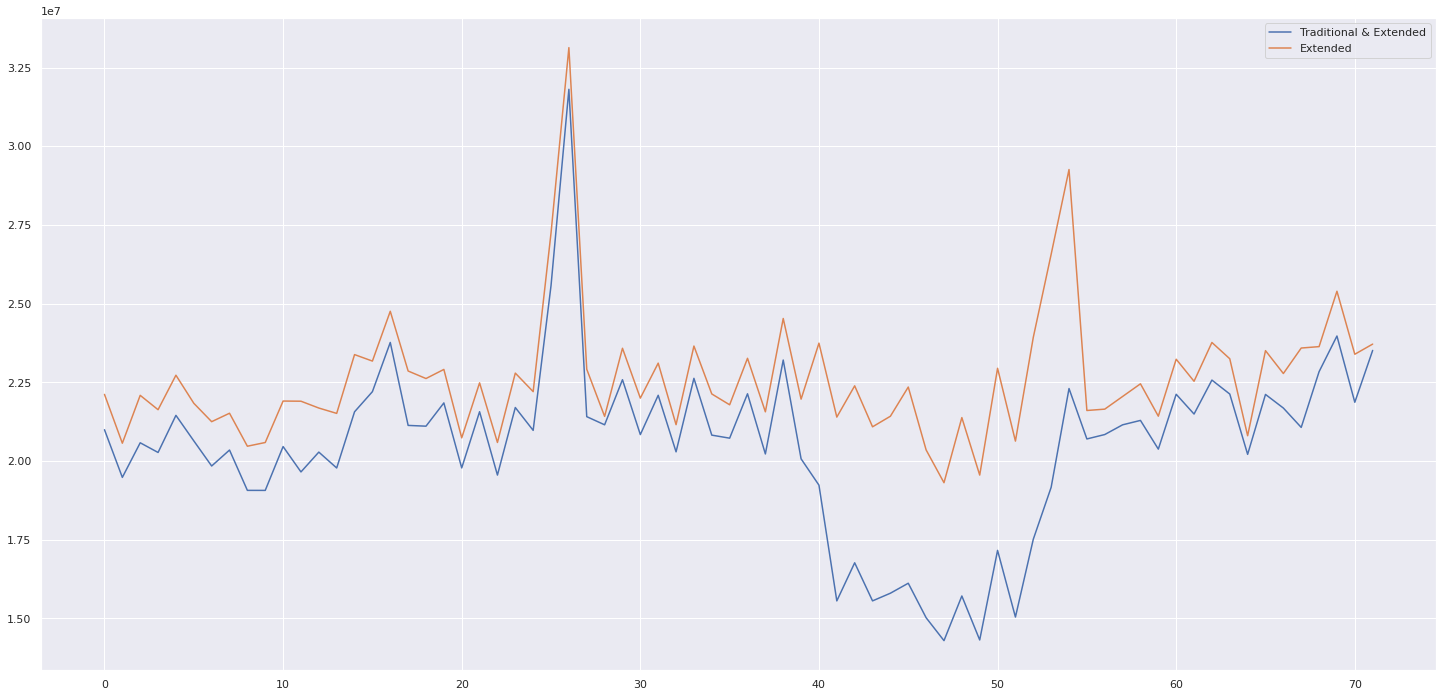

In [ ]:
aux1 = df4[(df4['promo'] == 1) & (df4['promo2'] == 1)][[
    'year_week', 'sales'
]].groupby('year_week').sum().reset_index()
ax = aux1.plot()

aux2 = df4[(df4['promo'] == 1) & (df4['promo2'] == 0)][[
    'year_week', 'sales'
]].groupby('year_week').sum().reset_index()
aux2.plot(ax=ax)

ax.legend(labels=['Traditional & Extended', 'Extended'])

**8.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**FALSA** Lojas ABERTAS durante o NATAL vendem MENOS

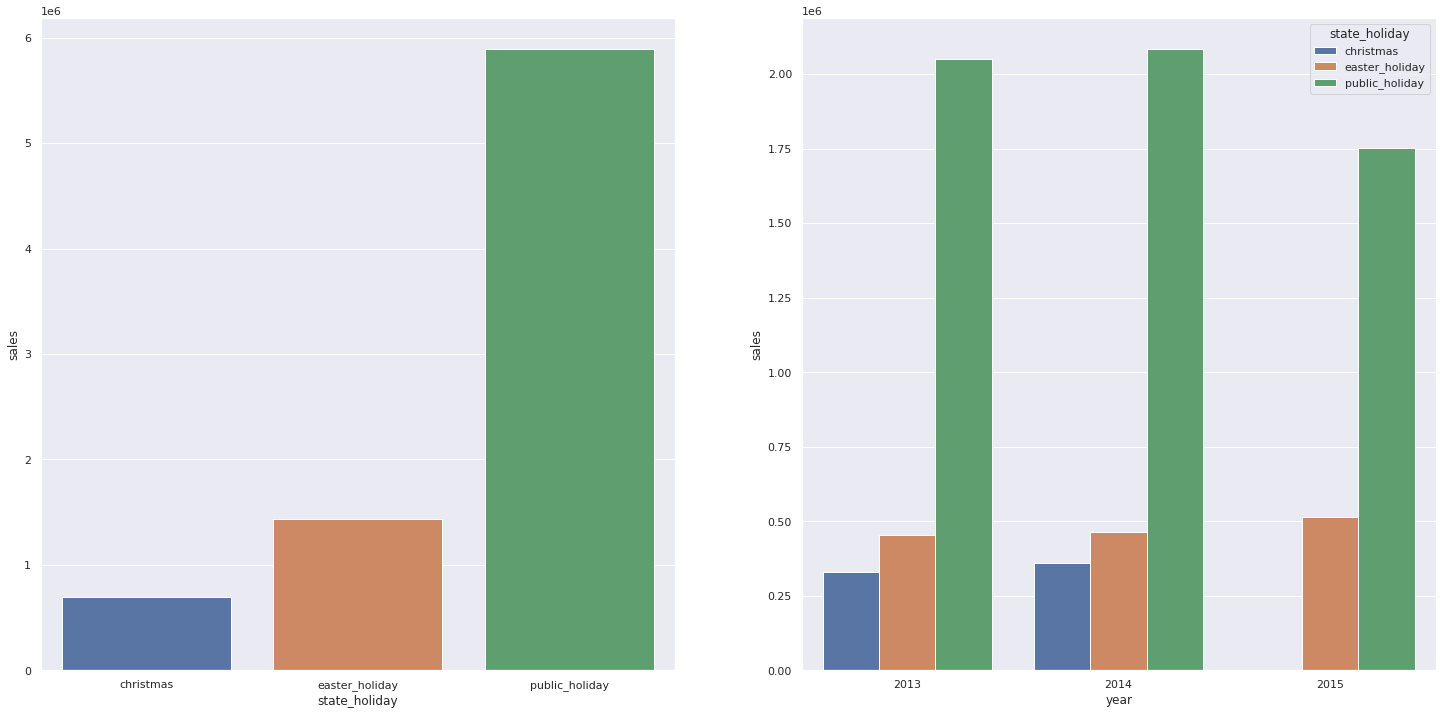

In [ ]:
aux = df4[df4['state_holiday'] != 'regular_day']

plt.subplot(1, 2, 1)
aux1 = aux[['state_holiday',
            'sales']].groupby('state_holiday').sum().reset_index()
sns.barplot(x='state_holiday', y='sales', data=aux1)

plt.subplot(1, 2, 2)
aux2 = aux[['year', 'state_holiday',
            'sales']].groupby(['year', 'state_holiday']).sum().reset_index()
sns.barplot(x='year', y='sales', hue='state_holiday', data=aux2)


**9.** Lojas deveriam vender mais ao longo dos anos.

**FALSO** O fluxo de vendas anuais estao em constante caimento


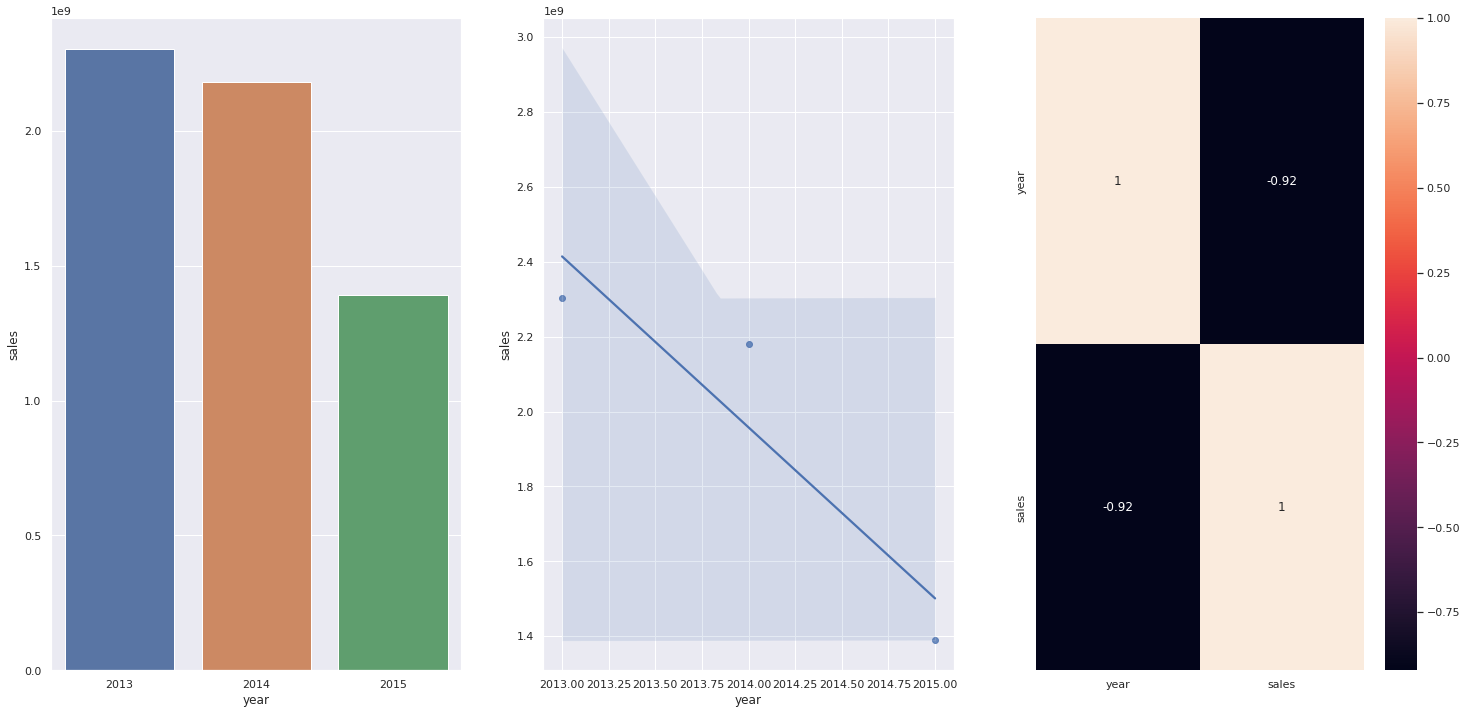

In [ ]:
aux1 = df4[['year', 'sales']].groupby('year').sum().reset_index()

plt.subplot(1, 3, 1)
sns.barplot(x='year', y='sales', data=aux1)

plt.subplot(1, 3, 2)
sns.regplot(x='year', y='sales', data=aux1)

plt.subplot(1, 3, 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True)



**10.** Lojas deveriam vender mais no segundo semestre do ano.

**FALSO** As lojas vendem MENOS no segundo semestre

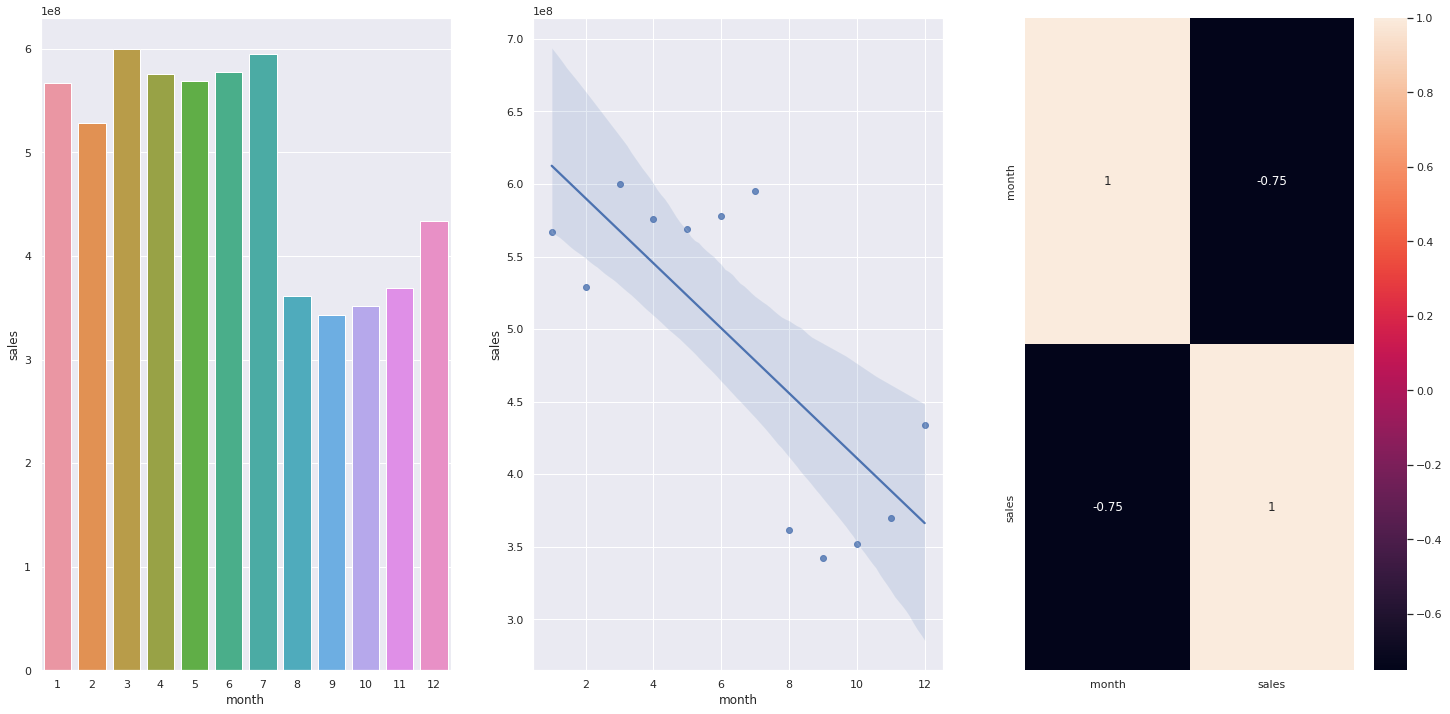

In [ ]:
aux1 = df4[['month', 'sales']].groupby('month').sum().reset_index()

plt.subplot(1, 3, 1)
sns.barplot(x='month', y='sales', data=aux1)

plt.subplot(1, 3, 2)
sns.regplot(x='month', y='sales', data=aux1)

plt.subplot(1, 3, 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True)



**11.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**VERDADEIRO** O maior numero de vendas se concetra APOS O DIA 10

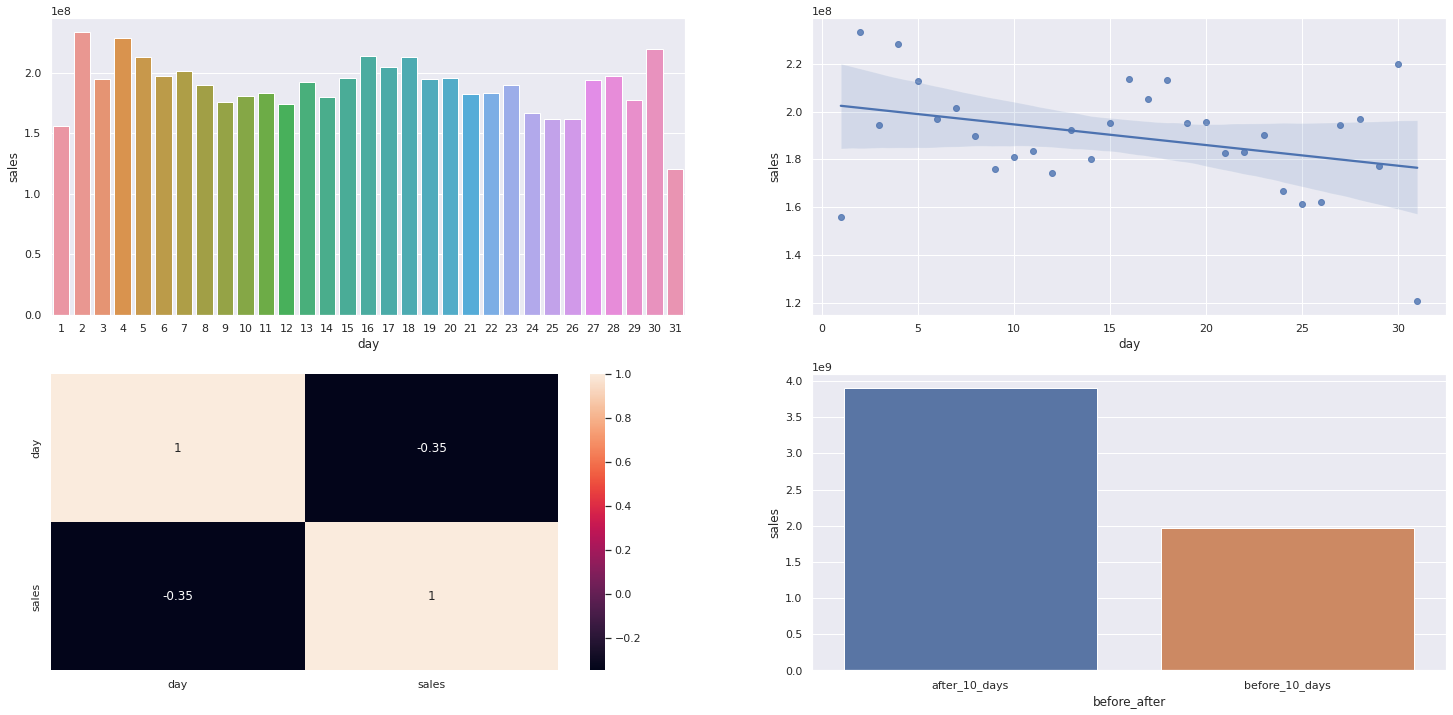

In [ ]:
aux1 = df4[['day', 'sales']].groupby('day').sum().reset_index()

plt.subplot(2, 2, 1)
sns.barplot(x='day', y='sales', data=aux1)

plt.subplot(2, 2, 2)
sns.regplot(x='day', y='sales', data=aux1)

plt.subplot(2, 2, 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True)

aux1['before_after'] = aux1['day'].apply(lambda x: 'before_10_days'
                                         if x <= 10 else 'after_10_days')
aux2 = aux1[['before_after',
             'sales']].groupby('before_after').sum().reset_index()

plt.subplot(2, 2, 4)
sns.barplot(x='before_after', y='sales', data=aux2)



**12.** Lojas deveriam vender menos aos finais de semana.

**VERDADEIRO**, os MENORES numeros de venda da semana se concentram aos FINAIS de SEMANA

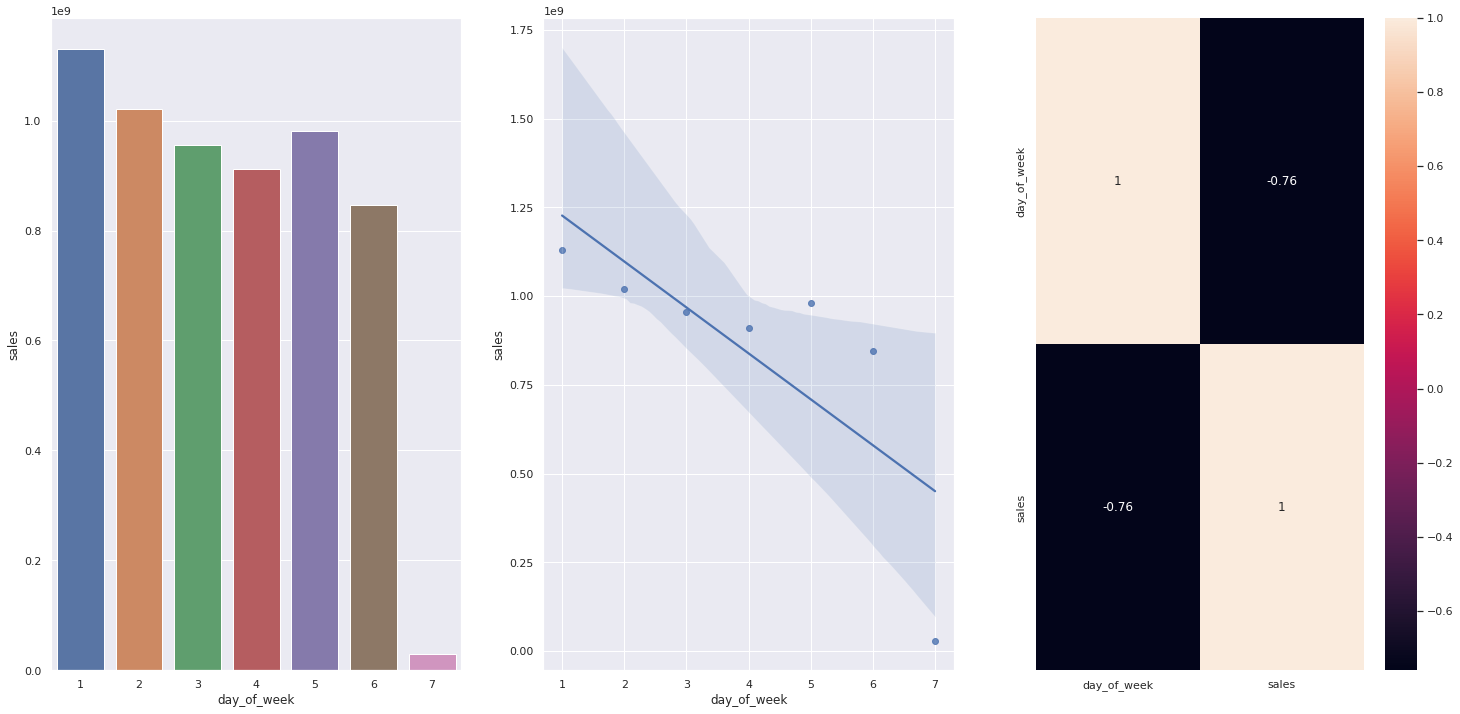

In [ ]:
aux1 = df4[['day_of_week', 'sales']].groupby('day_of_week').sum().reset_index()

plt.subplot(1, 3, 1)
sns.barplot(x='day_of_week', y='sales', data=aux1)

plt.subplot(1, 3, 2)
sns.regplot(x='day_of_week', y='sales', data=aux1)

plt.subplot(1, 3, 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True)


**13.** Lojas deveriam vender menos durante os feriados escolares.

**VERDADEIRO** Vendme menos exceto No mes de Julho se EQUIPARA e em Agosto se VENDE MAIS

In [ ]:
#from tabulate import tabulate

## 4.3. Analise Muiltivariada

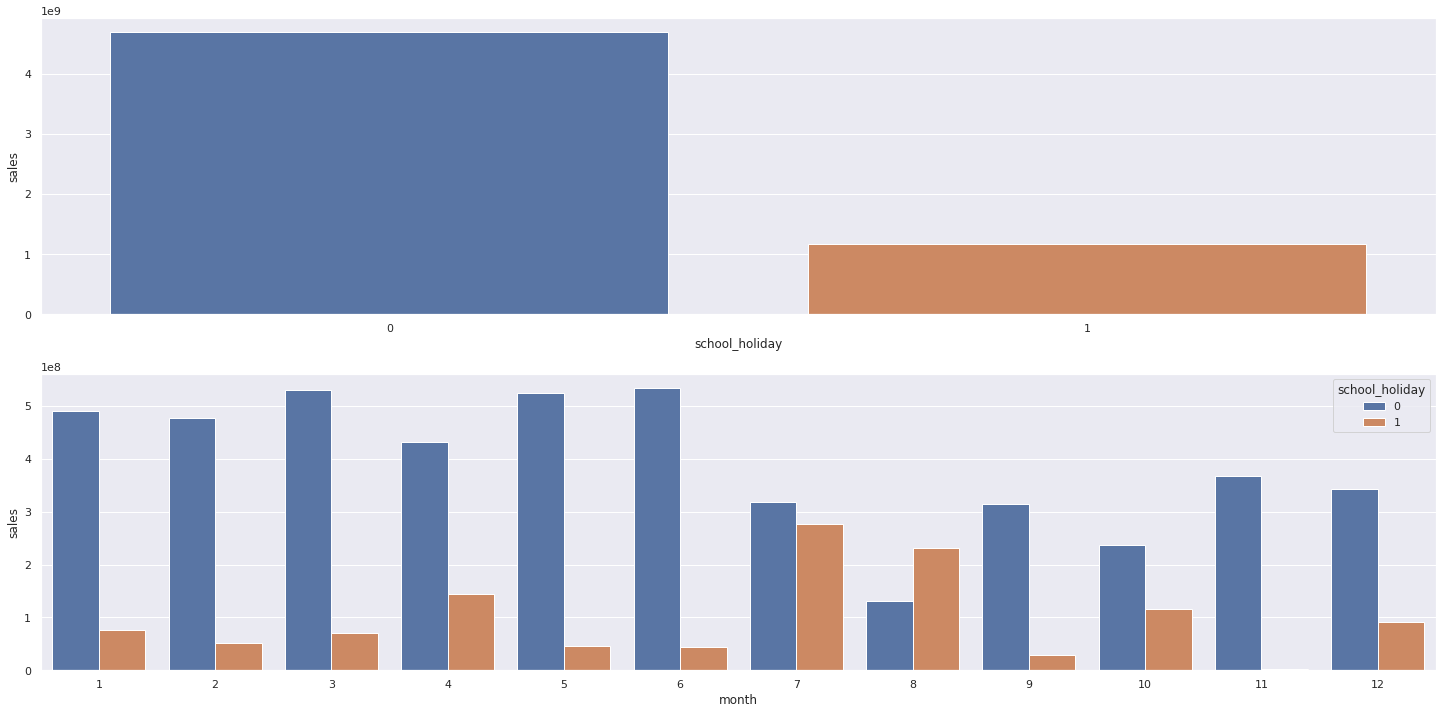

In [ ]:
aux1 = df4[['school_holiday',
            'sales']].groupby('school_holiday').sum().reset_index()

plt.subplot(2, 1, 1)
sns.barplot(x='school_holiday', y='sales', data=aux1)

aux2 = df4[['month', 'school_holiday',
            'sales']].groupby(['month', 'school_holiday']).sum().reset_index()

plt.subplot(2, 1, 2)
sns.barplot(x='month', y='sales', hue='school_holiday', data=aux2)

### 4.3.1 Numerical Attributes

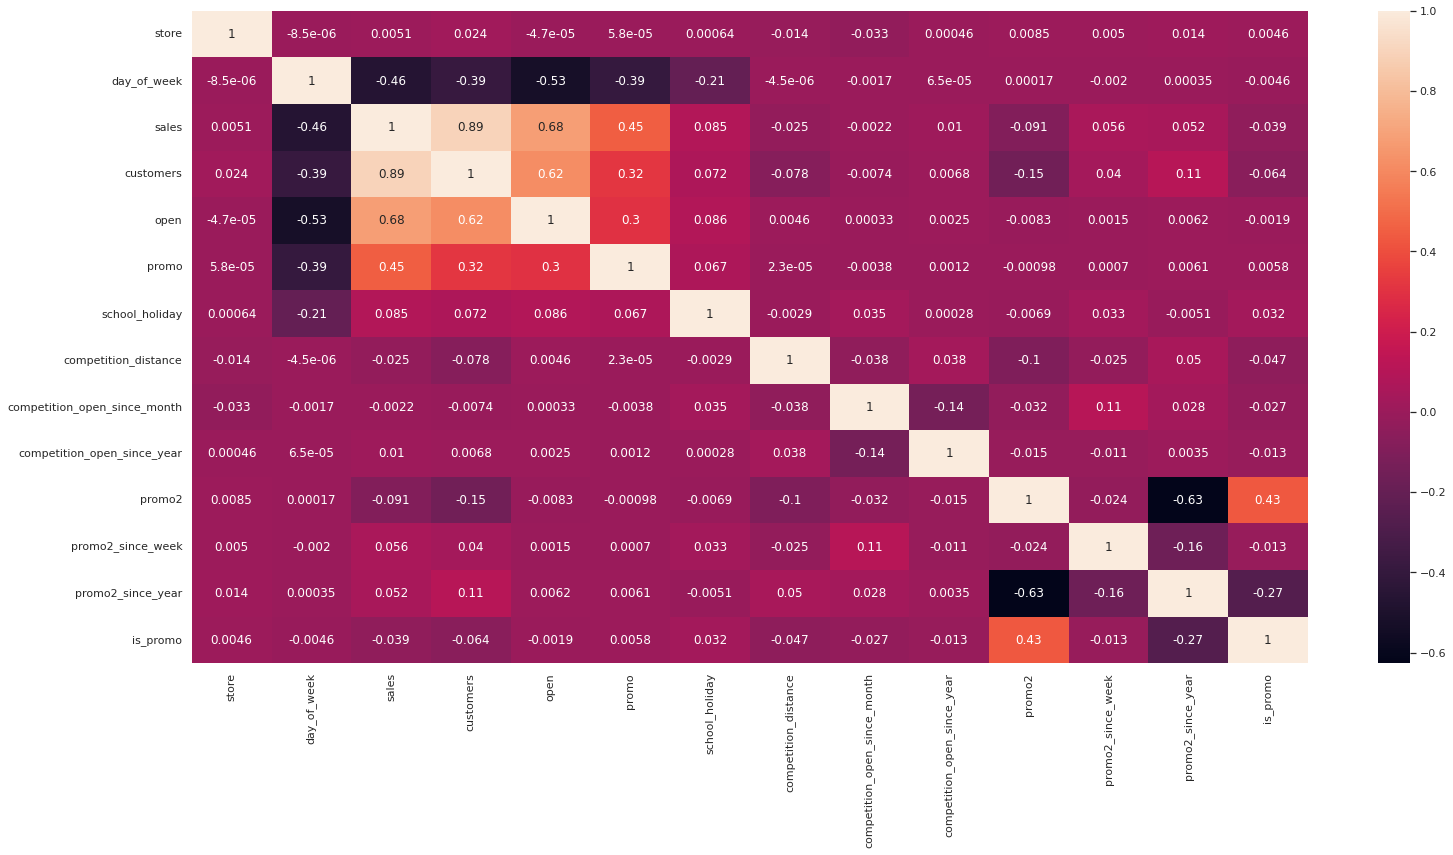

In [ ]:
correlation = num_attributes.corr(method='pearson')
sns.heatmap(correlation, annot=True)

### 4.3.2 Categorical Attributes

In [ ]:
a = df4.select_dtypes(include='object')

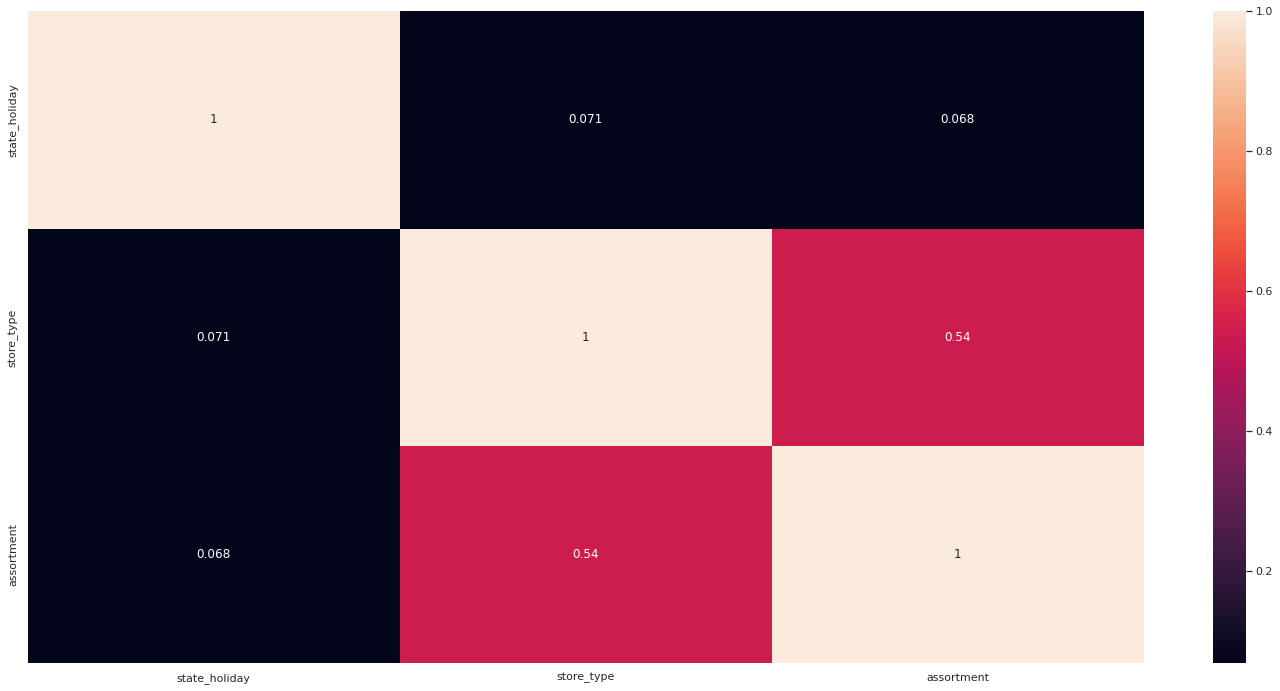

In [ ]:
# ONLY CATEGORICAL data
a = df4.select_dtypes(include='object')

#Calculatre cramer V
a1 = cramer_v(a['state_holiday'], a['state_holiday'])
a2 = cramer_v(a['state_holiday'], a['store_type'])
a3 = cramer_v(a['state_holiday'], a['assortment'])

a4 = cramer_v(a['store_type'], a['state_holiday'])
a5 = cramer_v(a['store_type'], a['store_type'])
a6 = cramer_v(a['store_type'], a['assortment'])

a7 = cramer_v(a['assortment'], a['state_holiday'])
a8 = cramer_v(a['assortment'], a['store_type'])
a9 = cramer_v(a['assortment'], a['assortment'])

#Final DataSet
d = pd.DataFrame({
    'state_holiday': [a1, a2, a3],
    'store_type': [a4, a5, a6],
    'assortment': [a7, a8, a9]
})

d = d.set_index(d.columns)

#Grafic
sns.heatmap(d, annot=True)